In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os
import numpy as np
import glob
import shutil
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

/home/wajeeh-ros/.conda/envs/python3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/wajeeh-ros/.conda/envs/python3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/wajeeh-ros/.conda/envs/python3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/wajeeh-ros/.conda/envs/python3/lib

In [3]:
_URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

zip_file = tf.keras.utils.get_file(origin=_URL,
                                   fname="flower_photos.tgz",
                                   extract=True)

base_dir = os.path.join(os.path.dirname(zip_file), 'flower_photos')

228818944/228813984 [==============================] - 45s 0us/step


In [4]:
classes = ['roses', 'daisy', 'dandelion', 'sunflowers', 'tulips']

In [5]:
for cl in classes:
  img_path = os.path.join(base_dir, cl)
  images = glob.glob(img_path + '/*.jpg')
  print("{}: {} Images".format(cl, len(images)))
  train, val = images[:round(len(images)*0.8)], images[round(len(images)*0.8):]

  for t in train:
    if not os.path.exists(os.path.join(base_dir, 'train', cl)):
      os.makedirs(os.path.join(base_dir, 'train', cl))
    shutil.move(t, os.path.join(base_dir, 'train', cl))

  for v in val:
    if not os.path.exists(os.path.join(base_dir, 'val', cl)):
      os.makedirs(os.path.join(base_dir, 'val', cl))
    shutil.move(v, os.path.join(base_dir, 'val', cl))

roses: 641 Images
daisy: 633 Images
dandelion: 898 Images
sunflowers: 699 Images
tulips: 799 Images


In [6]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

In [7]:
batch_size = 100
IMG_SIZE = 150

### TODO: Apply Random Horizontal Flip

In the cell below, use ImageDataGenerator to create a transformation that rescales the images by 255 and then applies a random horizontal flip. Then use the `.flow_from_directory` method to apply the above transformation to the images in our training set. Make sure you indicate the batch size, the path to the directory of the training images, the target size for the images, and to shuffle the images. 

In [8]:
img_gen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip=True,
)

train_data_gen = img_gen.flow_from_directory(
    batch_size=batch_size,
    directory=train_dir,
    target_size=(IMG_SIZE,IMG_SIZE),
    shuffle=True
    
)

Found 2935 images belonging to 5 classes.


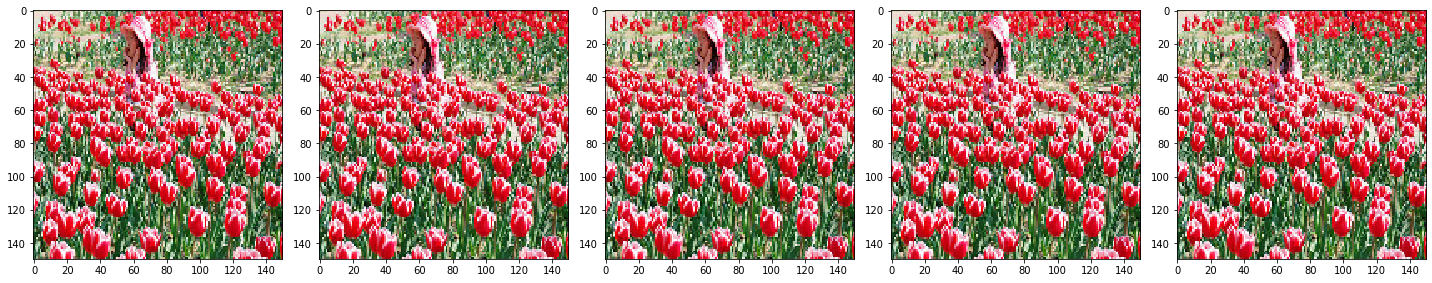

In [9]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()


augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [10]:
image_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45
)

train_data_gen = image_gen.flow_from_directory(
    batch_size=batch_size,
    directory=train_dir,
    target_size=(IMG_SIZE,IMG_SIZE),
    shuffle=True
)

Found 2935 images belonging to 5 classes.


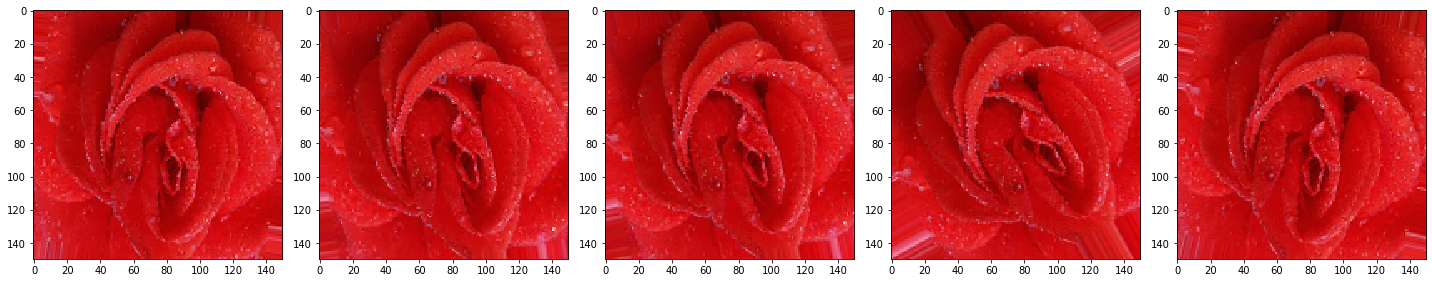

In [11]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [12]:
image_gen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=50
)

train_data_gen = image_gen.flow_from_directory(
    batch_size=batch_size,
    directory=train_dir,
    target_size=(IMG_SIZE,IMG_SIZE),
    shuffle=True
)

Found 2935 images belonging to 5 classes.


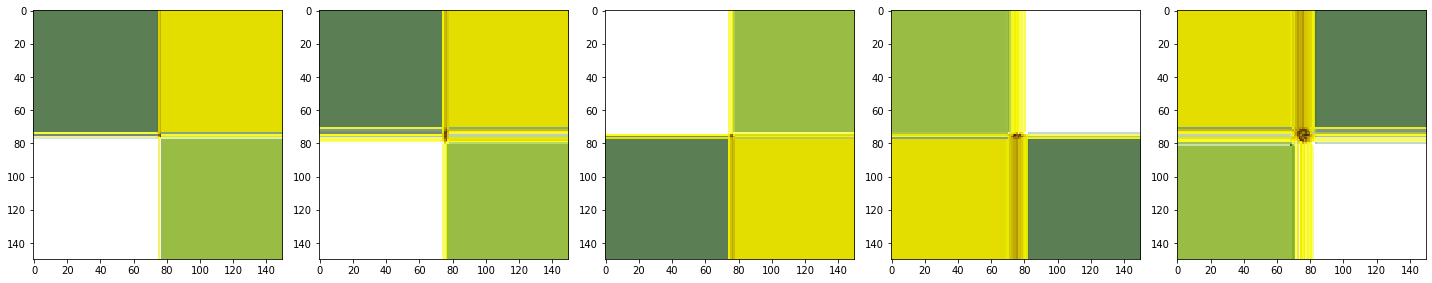

In [13]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [14]:
image_gen_train = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip=True,
    rotation_range=45,
    zoom_range=50,
    width_shift_range=0.15,
    height_shift_range=0.15
) 

train_data_gen = image_gen_train.flow_from_directory(
    batch_size=batch_size,
    directory=train_dir,
    target_size=(IMG_SIZE,IMG_SIZE),
    shuffle=True
)

Found 2935 images belonging to 5 classes.


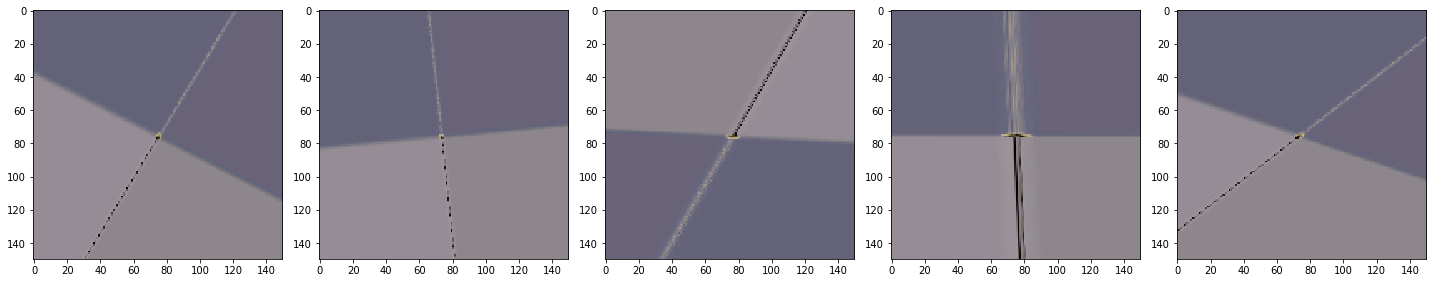

In [15]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [16]:
image_gen_val = ImageDataGenerator(
rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(
    target_size=(IMG_SIZE,IMG_SIZE),
    batch_size=batch_size,
    directory=val_dir,
    class_mode='sparse'
)

Found 735 images belonging to 5 classes.


### TODO: Create the CNN
In the cell below, create a convolutional neural network that consists of 3 convolution blocks. Each convolutional block contains a Conv2D layer followed by a max pool layer. The first convolutional block should have 16 filters, the second one should have 32 filters, and the third one should have 64 filters. All convolutional filters should be 3 x 3. All max pool layers should have a pool_size of (2, 2).

After the 3 convolutional blocks you should have a flatten layer followed by a fully connected layer with 512 units. The CNN should output class probabilities based on 5 classes which is done by the softmax activation function. All other layers should use a relu activation function. You should also add Dropout layers with a probability of 20%, where appropriate. 

In [29]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_SIZE,IMG_SIZE, 3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(512, activation='relu'))

model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(5, activation='softmax'))

In the cell below, compile your model using the ADAM optimizer, the sparse cross entropy function as a loss function. We would also like to look at training and validation accuracy on each epoch as we train our network, so make sure you also pass the metrics argument.

In [30]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 20736)            

#### Train the model
In the cell below, train your model using the fit_generator function instead of the usual fit function. We have to use the fit_generator function because we are using the ImageDataGenerator class to generate batches of training and validation data for our model. Train the model for 80 epochs and make sure you use the proper parameters in the fit_generator function.

In [33]:
train_data_gen.n

2935

In [35]:
batch_size

100

In [34]:
val_data_gen.n

735

In [36]:
epochs = 80

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(train_data_gen.n / float(batch_size))),
    epochs=epochs,
    validation_data=val_data_gen,
    #validation_steps=int(np.ceil(val_data_gen.n / float(batch_size)))
    validation_steps=74
)

Epoch 1/80


InvalidArgumentError:  logits and labels must have the same first dimension, got logits shape [100,5] and labels shape [500]
	 [[node loss_3/dense_5_loss/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits (defined at <ipython-input-32-7fa7f550ff06>:8) ]] [Op:__inference_keras_scratch_graph_2916]

Function call stack:
keras_scratch_graph


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()